In [1]:
import pandas as pd
df = pd.read_csv(filepath_or_buffer='/kaggle/input/shipwrecks-sunk-ships/Shipwrecks or Sunk ships.csv', parse_dates=['Sunk date'])
df.head()

,Ship,Flag,Sunk date,Notes,Coordinates
0,Black Assarca shipwreck,Unknown,Early 7th century (Presumed),A wreck discovered at Black Assarca Island in ...,NaN
1,Globe Star,Singapore,27-Apr-73,A cargo ship that ran aground off Mombasa.[1],4°04′54″S 39°43′12″E
2,Gulland,Aden,13-Apr-51,A 545-ton Isles-class trawler built for World ...,04°02′50″S 39°43′57″E
3,Mtongwe,Tanzania,27-Apr-94,A Likoni and Mombasa route ferry that capsized...,NaN
4,Katina P,Greece,26-Apr-92,"An oil tanker that was damaged in a storm, spi...",25°35′S 32°59′E


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3971 entries, 0 to 3970
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Ship         3952 non-null   object
 1   Flag         3202 non-null   object
 2   Sunk date    3573 non-null   object
 3   Notes        3914 non-null   object
 4   Coordinates  1019 non-null   object
dtypes: object(5)
memory usage: 155.2+ KB


<Axes: ylabel='Frequency'>

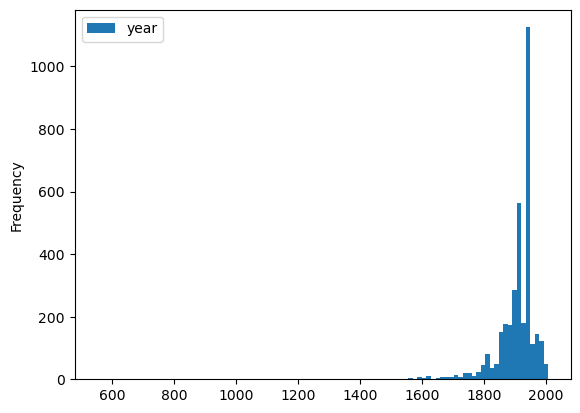

In [3]:
from numpy import nan
def get_year(arg) -> float:
    if isinstance(arg, float):
        return arg
    if isinstance(arg, str):
        if arg.isnumeric():
            return int(arg)
    pieces = arg.split('-')
    if pieces[-1].isnumeric():
        return 1900 + int(pieces[-1])
    pieces = arg.split()
    if pieces[-1].isnumeric():
        return int(pieces[-1])
    return nan
df['year'] = df['Sunk date'].apply(get_year)
df[['year']].plot.hist(bins=100)

What percentage of cases have something possibly useful in the Sunk date column but we don't yet know the year?

In [4]:
100 * round(len(df[(df['year'].isna()) & (df['Sunk date'] != 'Unknown')])/len(df), 2)

12.0